In [ ]:
# Name : MANDAR PANDURANG YADAV  |  Roll No : 20CO140  |  TE COMPUTER B

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
import warnings
%matplotlib inline

In [2]:
# read the csv file
df = pd.read_csv("E:\covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# check the columns that we have in the data
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [4]:
# check the shape of the dataframe
df.shape

(18110, 9)

In [5]:
# check if the data has any null values
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
# check the data types
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [7]:
# last few values in the dataframe
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [8]:
# check the values for the columns Confirmed Indian National and Confirmed Foreign National’
df['ConfirmedIndianNational'].value_counts()

-      17664
1        108
3         73
2         33
4         21
       ...  
41         1
86         1
87         1
45         1
110        1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [9]:
df['ConfirmedForeignNational'].value_counts()

-     17664
0       314
1        39
2        36
14       25
3        12
10        6
8         5
7         3
6         3
11        2
9         1
Name: ConfirmedForeignNational, dtype: int64

In [10]:
# We can see that most of the rows for the above column have null values, hence we can drop this column.
# Sno and Time can be dropped as well as it does not have any relevant information.
df = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational', 'Sno', 'Time'], axis = 1)
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [11]:
# let’s check states for which the dataframe contains the information
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [12]:
# Let us rename the column State/UnionTerritory for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)
df['States'] = df['States'].replace(['Maharashtra'],'MH')
df['States'] = df['States'].replace(['Kerala'],'KL')
df['States'] = df['States'].replace(['Karnataka'],'KA')
df['States'] = df['States'].replace(['Tamil Nadu'],'TN')
df['States'] = df['States'].replace(['Andhra Pradesh'],'AP')
df['States'] = df['States'].replace(['Uttar Pradesh'],'UP')
df['States'] = df['States'].replace(['Madhya Pradesh'],'MP')
df['States'] = df['States'].replace(['Karanataka'],'KA')
df['States'] = df['States'].replace(['West Bengal'],'WB')
df['States'] = df['States'].replace(['Himachal Pradesh'],'HP')
df['States'] = df['States'].replace(['Jammu and Kashmir'],'JNK')
df['States'].unique()

array(['KL', 'Telengana', 'Delhi', 'Rajasthan', 'UP', 'Haryana', 'Ladakh',
       'TN', 'KA', 'MH', 'Punjab', 'JNK', 'AP', 'Uttarakhand', 'Odisha',
       'Puducherry', 'WB', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'HP',
       'MP', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Maharashtra***'],
      dtype=object)

In [13]:
# Let us now find out the maximum cases until 11th Aug 2021 for each state
df_latest = df[df['Date']=="2021-08-11"]
df_latest.head()

,Date,States,Cured,Deaths,Confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,AP,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [14]:
# Let’s find out the total confirmed cases till 11th Aug 2021
df_latest['Confirmed'].sum()

32036511

In [15]:
# We will now find out the percentage for Active, fatal and cured cases
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['%Cured']=(df['Cured']/df['Confirmed'])*100
df['%Deaths']=(df['Deaths']/df['Confirmed'])*100
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)
df_latest.head(10)

,Date,States,Cured,Deaths,Confirmed
18094,2021-08-11,MH,6159676,134201,6363442
18090,2021-08-11,KL,3396184,18004,3586693
18089,2021-08-11,KA,2861499,36848,2921049
18104,2021-08-11,TN,2524400,34367,2579130
18075,2021-08-11,AP,1952736,13564,1985182
18108,2021-08-11,UP,1685492,22775,1708812
18109,2021-08-11,WB,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


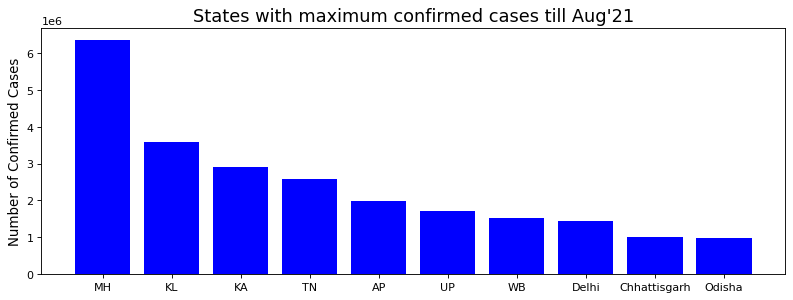

In [16]:
# Statewise Data
# Now we will check the data for the 10 most affected states with covid-19 in India.
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,4), dpi=80)
plt.bar(df_latest['States'][:10], df_latest['Confirmed'][:10],
align='center',color='blue')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title("States with maximum confirmed cases till Aug'21", size = 16)
plt.show()

In [17]:
# Top 10 States with Maximum Cases
df2= df_latest.copy()
df_Top= df2.head(10)
df_Top.style.background_gradient(cmap='Reds')

,Date,States,Cured,Deaths,Confirmed
18094,2021-08-11,MH,6159676,134201,6363442
18090,2021-08-11,KL,3396184,18004,3586693
18089,2021-08-11,KA,2861499,36848,2921049
18104,2021-08-11,TN,2524400,34367,2579130
18075,2021-08-11,AP,1952736,13564,1985182
18108,2021-08-11,UP,1685492,22775,1708812
18109,2021-08-11,WB,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


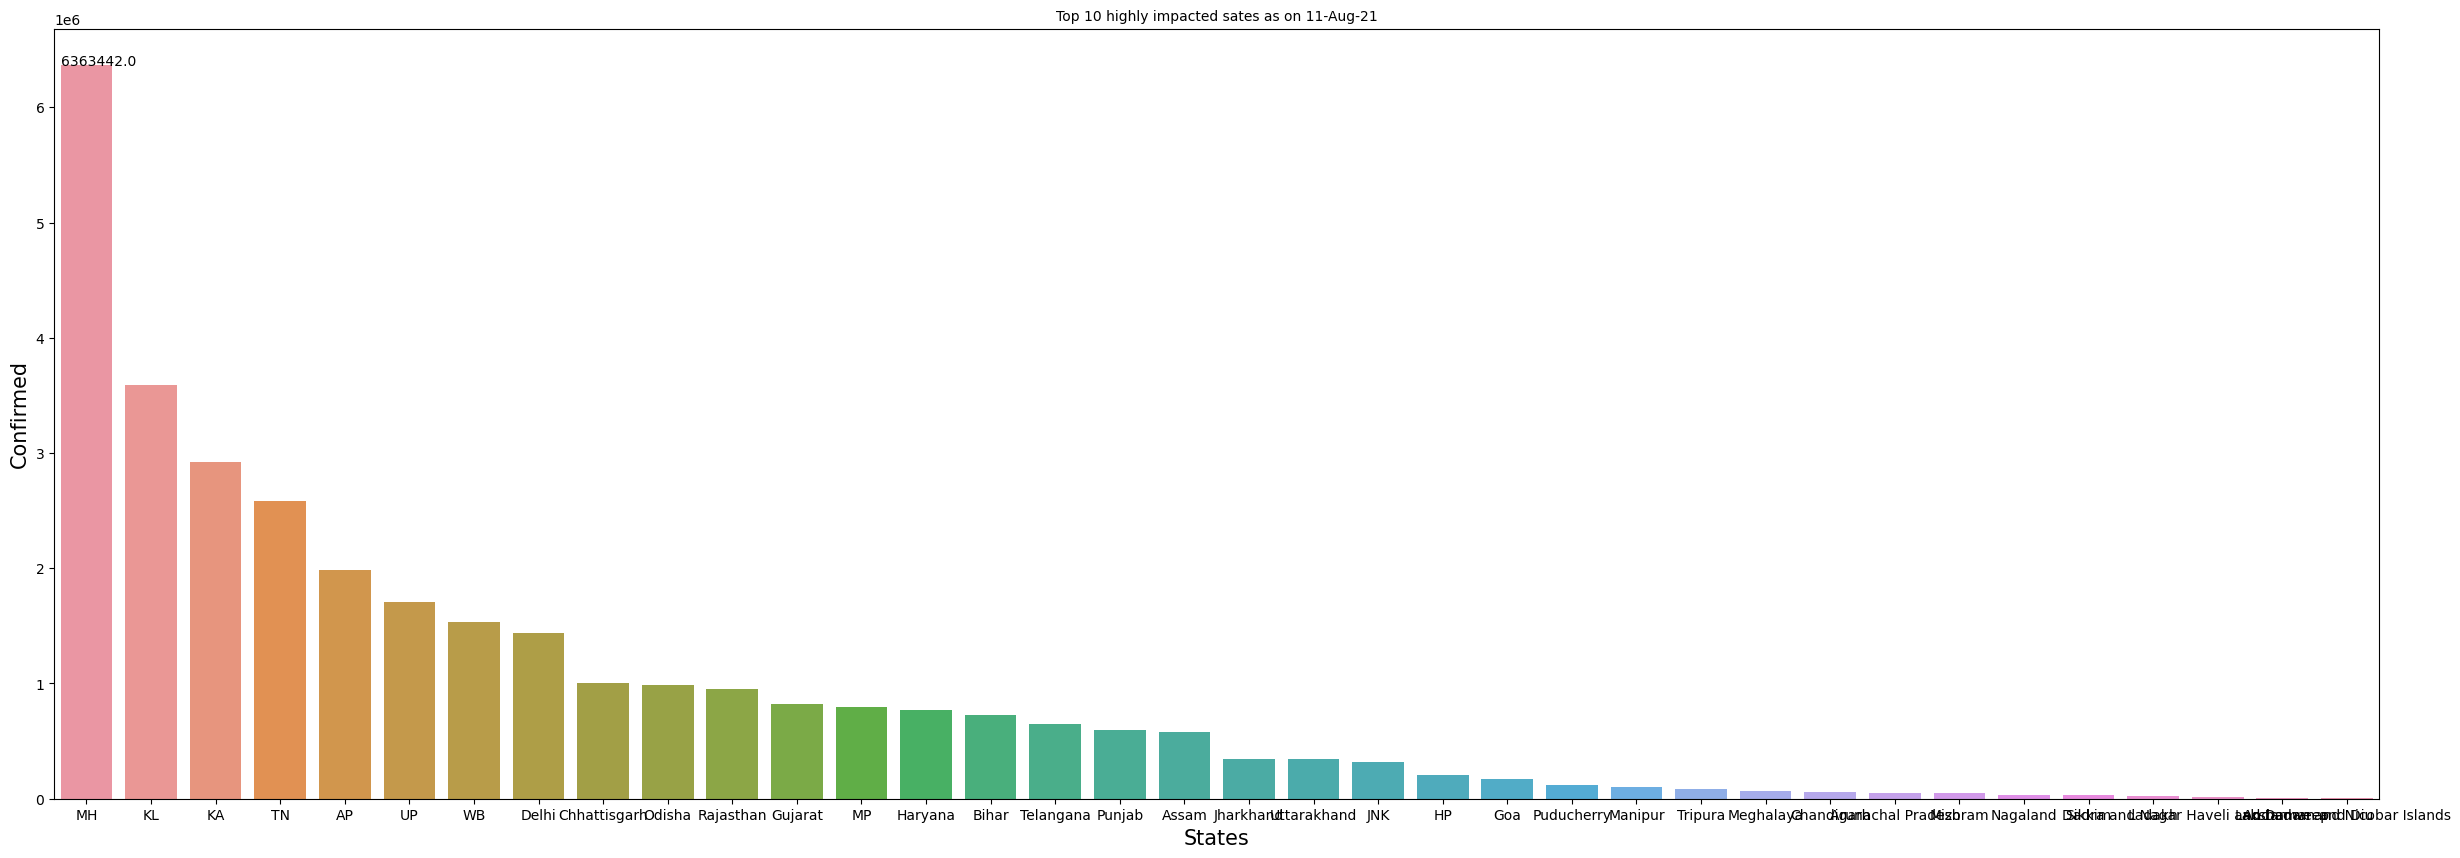

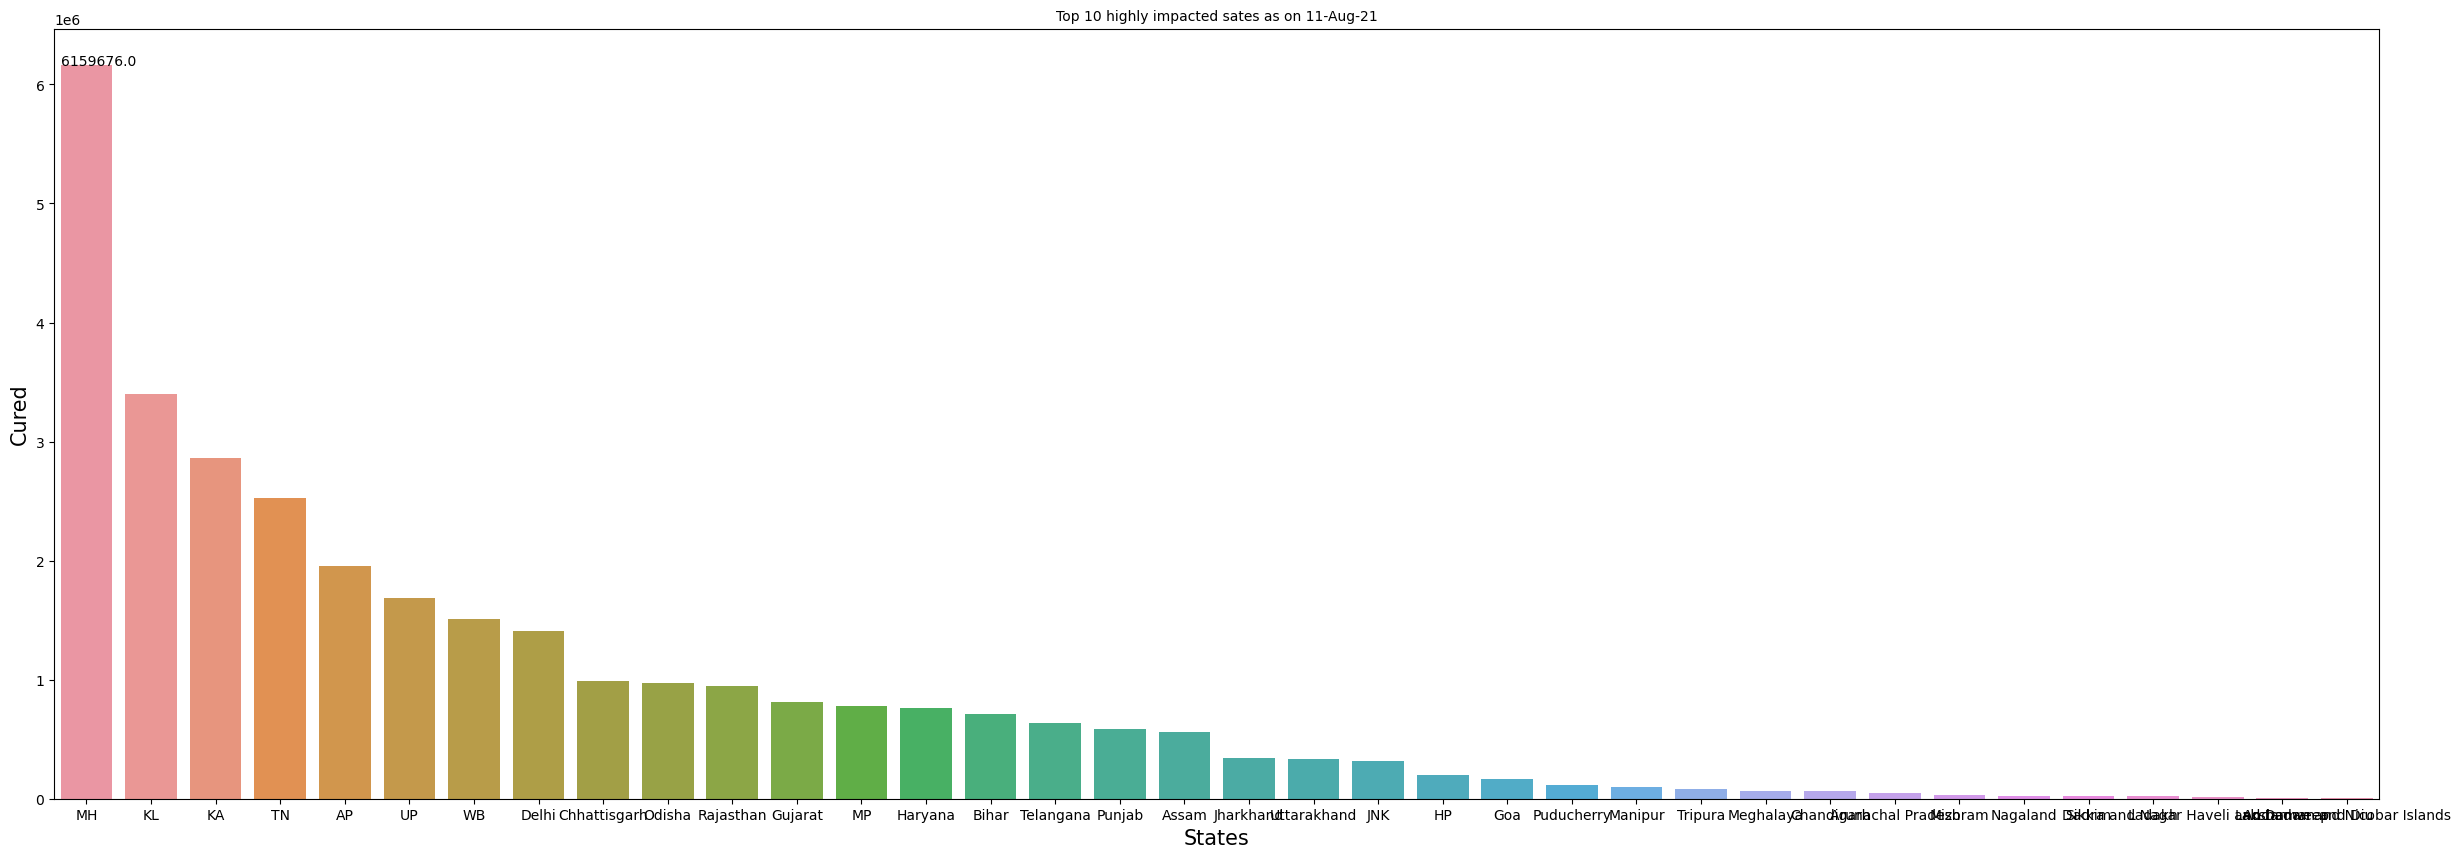

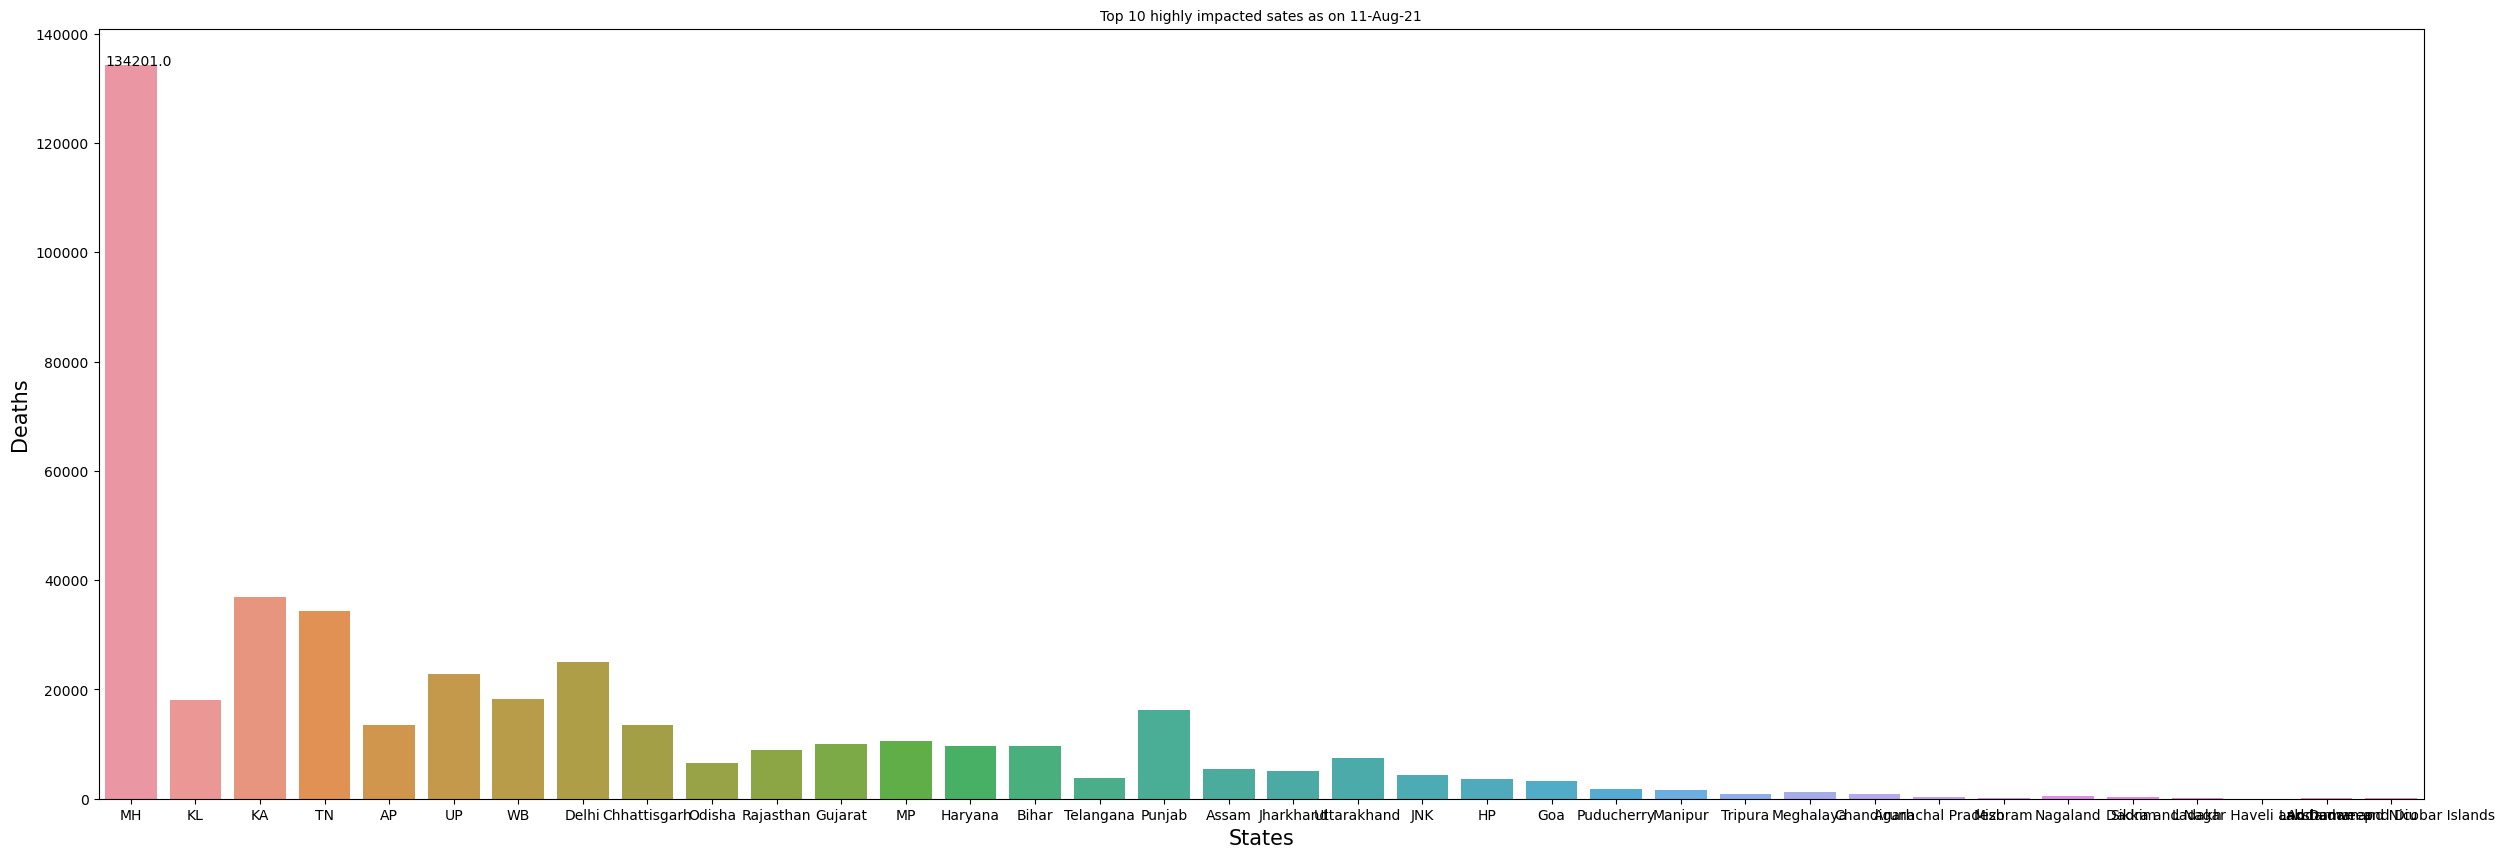

In [18]:
# Now we will check the data statewise:
df2 = df2.sort_values(by=['Confirmed'], ascending = False)
for feature in df2[['Confirmed','Cured','Deaths']]:
    fig=plt.figure(figsize=(30,10))
    plt.title("Top 10 highly impacted sates as on 11-Aug-21", size=10)
    ax=sns.barplot(data=df2,y=df2[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
        plt.show()

In [19]:
df_latest['Deaths'].sum()

429179

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

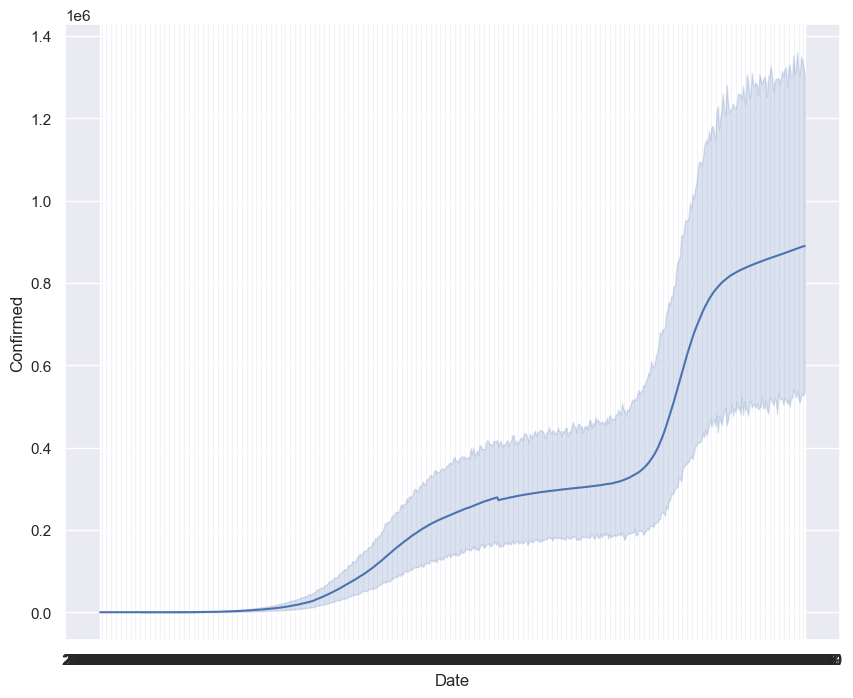

In [20]:
# The beow graph shows rise in total cases per day
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Date', y='Confirmed', data=df)

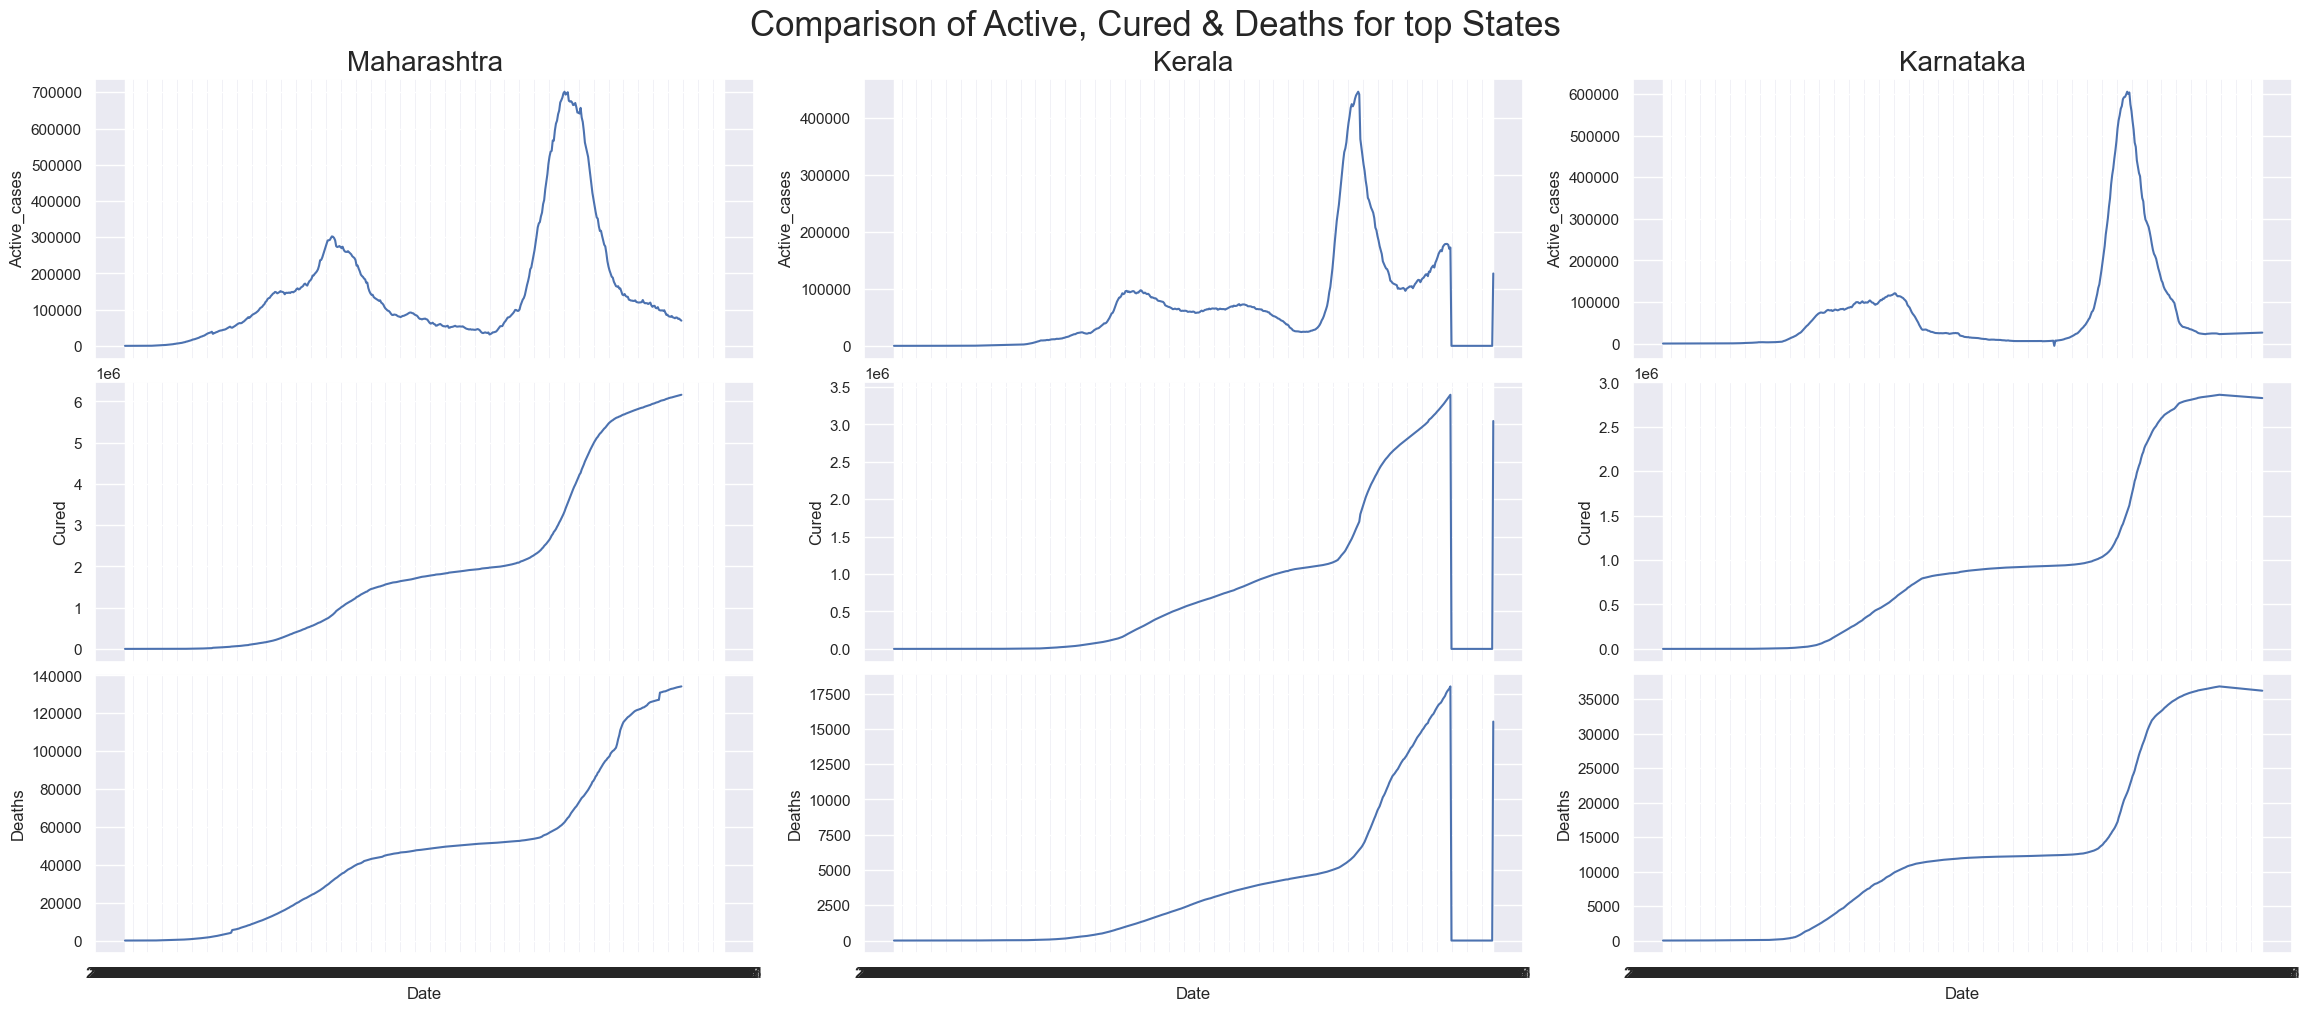

In [21]:
# Below we have a comparison of the Active, Cured and Confirmed cases for the Top States:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Uttar Pradesh', 'Madhya Pradesh','West Bengal' ]
MH=df[df['States']=='MH']
KL=df[df['States']=='KL']
KR=df[df['States']=='KA']
TN=df[df['States']=='TN']
AP=df[df['States']=='AP']
UP=df[df['States']=='UP']
WB=df[df['States']=='WB']
Delhi=df[df['States']=='Delhi']
Chhattisgarh=df[df['States']=='Chhattisgarh']
Odisha=df[df['States']=='Odisha']
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=MH, x='Date',y='Active_cases', ax=ax[0,0], color='b')
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=MH, x='Date',y='Cured', ax=ax[1,0], color='b')
sns.lineplot(data=MH, x='Date',y='Deaths', ax=ax[2,0], color='b')
sns.lineplot(data=KL, x='Date',y='Active_cases', ax=ax[0,1], color='b')
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=KL, x='Date',y='Cured', ax=ax[1,1], color='b')
sns.lineplot(data=KL, x='Date',y='Deaths', ax=ax[2,1], color='b')
sns.lineplot(data=KR, x='Date',y='Active_cases', ax=ax[0,2], color='b')
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=KR, x='Date',y='Cured', ax=ax[1,2], color='b')
sns.lineplot(data=KR, x='Date',y='Deaths', ax=ax[2,2], color='b')
plt.show()

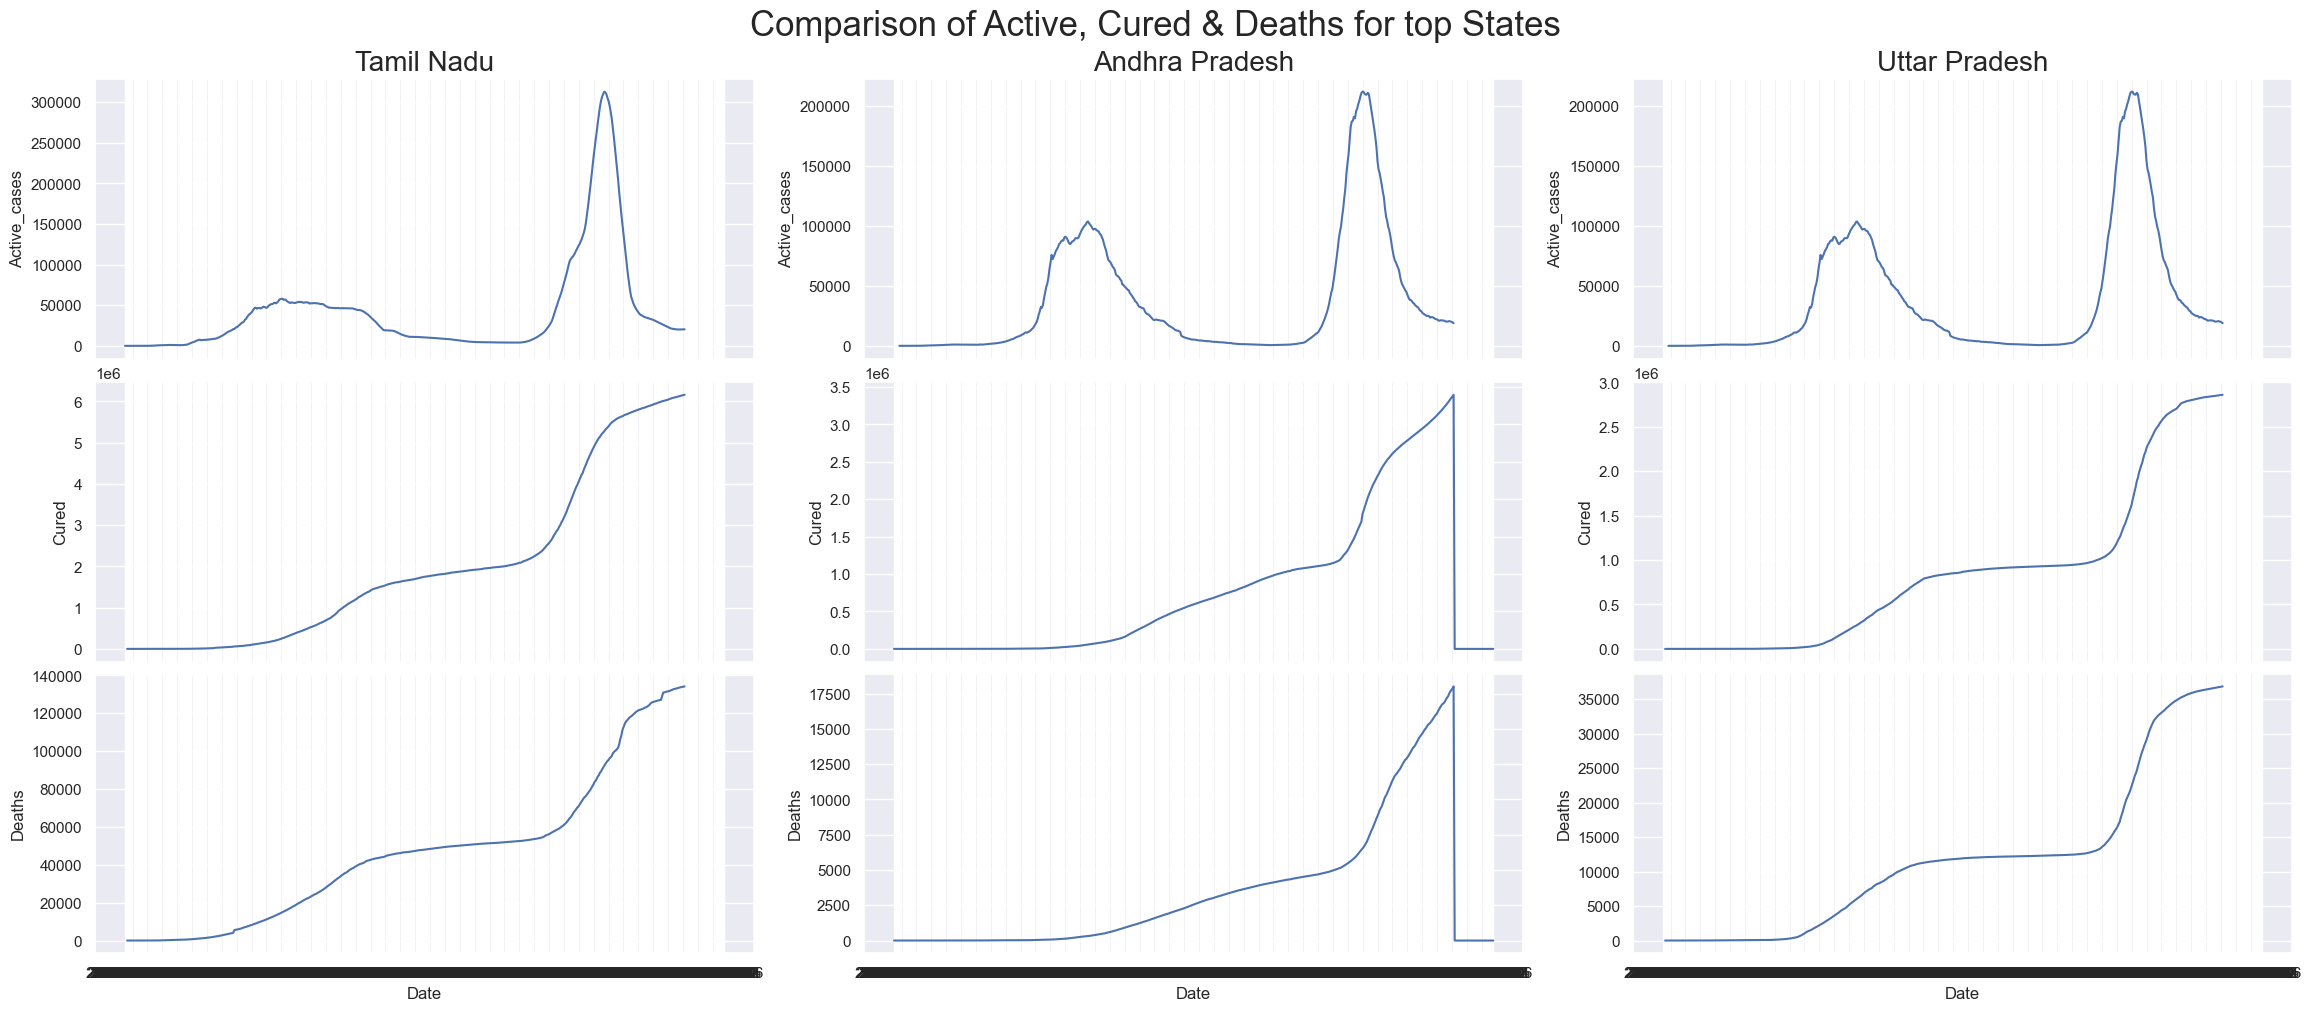

In [22]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=TN, x='Date',y='Active_cases', ax=ax[0,0], color='b')
ax[0,0].set_title("Tamil Nadu", size=20)
sns.lineplot(data=MH, x='Date',y='Cured', ax=ax[1,0], color='b')
sns.lineplot(data=MH, x='Date',y='Deaths', ax=ax[2,0], color='b')
sns.lineplot(data=AP, x='Date',y='Active_cases', ax=ax[0,1], color='b')
ax[0,1].set_title("Andhra Pradesh", size=20)
sns.lineplot(data=KL, x='Date',y='Cured', ax=ax[1,1], color='b')
sns.lineplot(data=KL, x='Date',y='Deaths', ax=ax[2,1], color='b')
sns.lineplot(data=AP, x='Date',y='Active_cases', ax=ax[0,2], color='b')
ax[0,2].set_title("Uttar Pradesh", size=20)
sns.lineplot(data=KR, x='Date',y='Cured', ax=ax[1,2], color='b')
sns.lineplot(data=KR, x='Date',y='Deaths', ax=ax[2,2], color='b')
plt.show()

In [23]:
df_latest.shape

(36, 5)

In [24]:
# Now let us divide the data into the year 2020 and 2021 to find the monthwise trend in regards to active cases, recovery rate and fatality.
# Date is converted to DateTime format.
df['Date']= pd.to_datetime(df['Date'])

# Considering data of only the year 2020.
data_20 = df[df['Date'].dt.year==2020]

# Considering data of only the year 2021.
data_21 = df[df['Date'].dt.year==2021]

# Month is accessed from the DateTime object.
data_20['Month']=data_20['Date'].dt.month 
data_21['Month']=data_21['Date'].dt.month

# Year 2020
# creating instances for ‘confirmed’,’deaths’,’discharged’ by month column
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum() 
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

# Year 2021
# creating instances for ‘confirmed’,’deaths’,’discharged’ by month column
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum() 
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()
cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)
cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1)

# Year 2020
# create instances for ‘death_rate and discharge_rate’
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4) 
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

# Year 2020
# create instances for ‘death_rate and discharge_rate’
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4) 
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

# Year 2020
data_20.reset_index(inplace=True)
data_20.head()

C:\Users\Mandar\AppData\Local\Temp\ipykernel_12848\1122033519.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20['Month']=data_20['Date'].dt.month
C:\Users\Mandar\AppData\Local\Temp\ipykernel_12848\1122033519.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_21['Month']=data_21['Date'].dt.month


,Month,Confirmed,Cured,Deaths,discharge_rate_20,death_rate_20
0,1,2,0,0,0.0000,0.0000
1,2,86,0,0,0.0000,0.0000
2,3,9687,808,202,8.3411,2.0853
3,4,422442,75443,13270,17.8588,3.1413
4,5,2938234,1133341,89834,38.5722,3.0574


In [25]:
# Year 2021
data_21.reset_index(inplace=True)
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


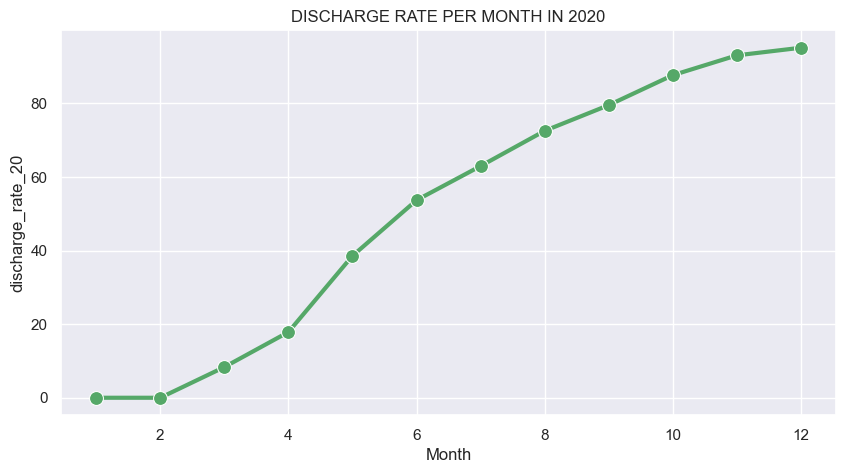

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

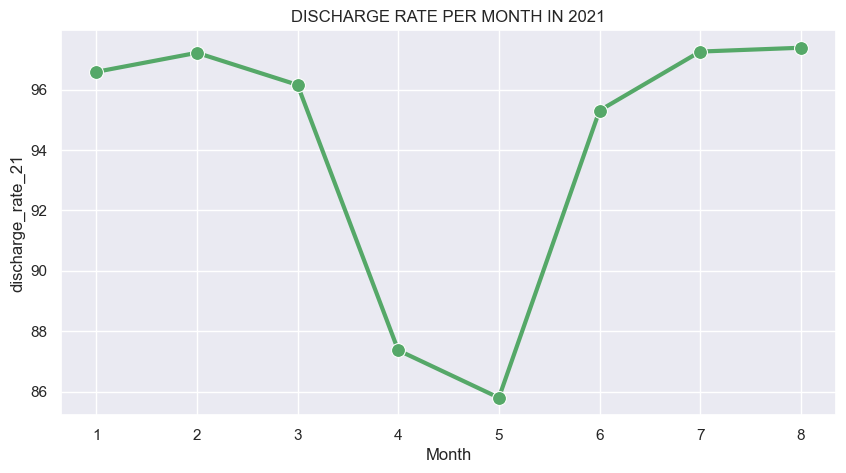

In [27]:
# Now let’s check datathe trend for the year 2021:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

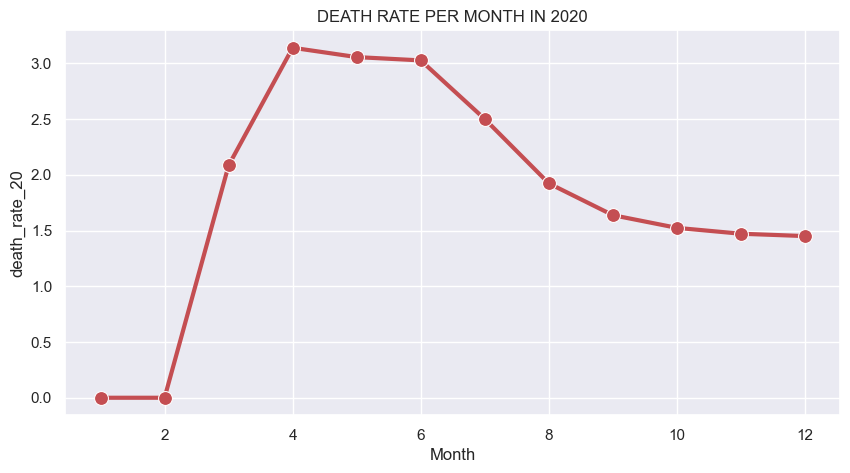

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

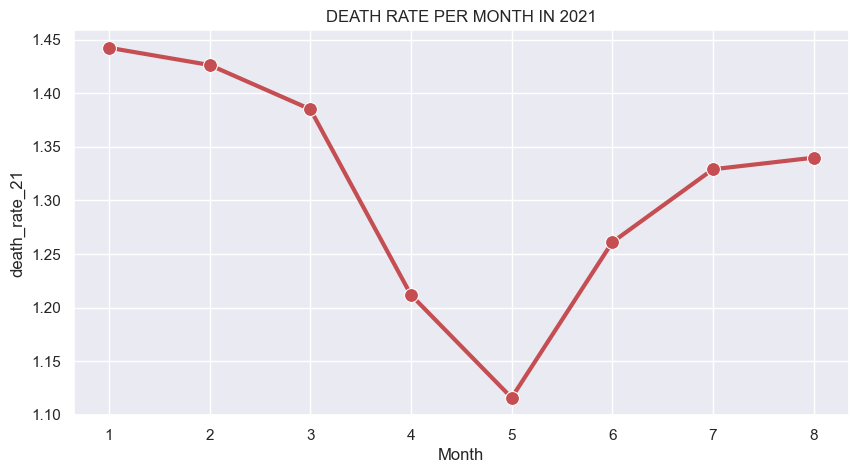

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

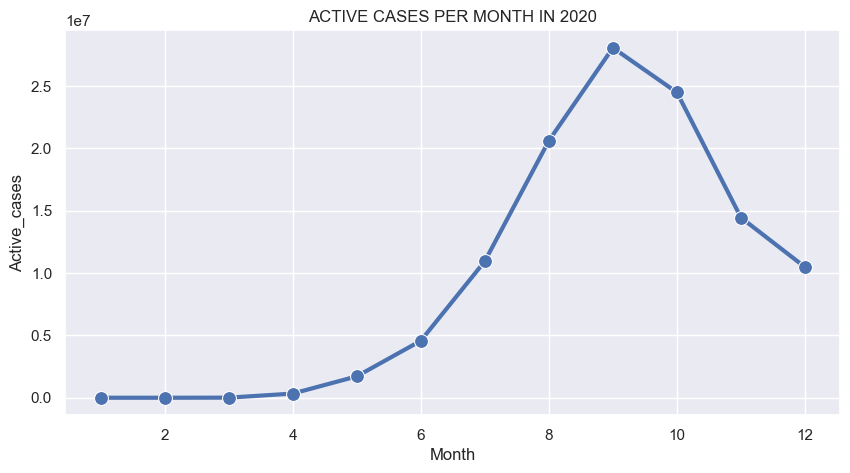

In [30]:
data_20['Active_cases']=data_20['Confirmed']-(data_20['Cured']+data_20['Deaths'])
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="Active_cases",data=data_20,color="b",lw=3,marker='o',markersize=10)
plt.title('ACTIVE CASES PER MONTH IN 2020')
plt.show()

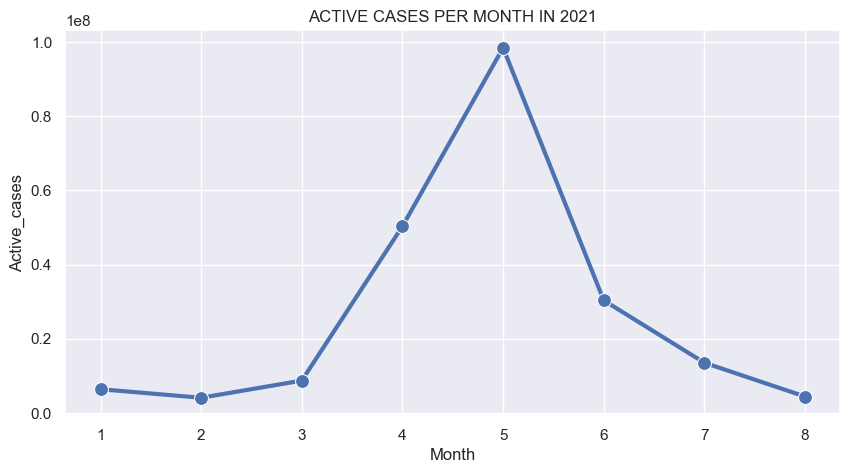

In [31]:
data_21['Active_cases']=data_21['Confirmed']-(data_21['Cured']+data_21['Deaths'])
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="Active_cases",data=data_21,color="b",lw=3,marker='o',markersize=10)
plt.title('ACTIVE CASES PER MONTH IN 2021')
plt.show()

In [32]:
# We will now take the data for Vaccination:
Vaccination = pd.read_csv("E:\Covid_vaccine_statewise.csv")
Vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [33]:
Vaccination.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [34]:
Vaccine_drive= Vaccination.copy()
Vaccine_drive= Vaccine_drive.iloc[:,[0,1,2,23]]
Vaccine_drive

,Updated On,State,Total Doses Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,48276.0
1,17/01/2021,India,58604.0,58604.0
2,18/01/2021,India,99449.0,99449.0
3,19/01/2021,India,195525.0,195525.0
4,20/01/2021,India,251280.0,251280.0
...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN


In [35]:
Vaccine_drive.rename(columns={'Updated On':'Date'}, inplace=True)
Vaccine_drive.rename(columns={'Total Doses Administered':'Total_Doses'}, inplace=True)
Vaccine_drive.rename(columns={'Total Individuals Vaccinated':'Citizens'}, inplace=True)
Vaccine_drive.head()

,Date,State,Total_Doses,Citizens
0,16/01/2021,India,48276.0,48276.0
1,17/01/2021,India,58604.0,58604.0
2,18/01/2021,India,99449.0,99449.0
3,19/01/2021,India,195525.0,195525.0
4,20/01/2021,India,251280.0,251280.0


In [36]:
Vaccine_drive.head()

,Date,State,Total_Doses,Citizens
0,16/01/2021,India,48276.0,48276.0
1,17/01/2021,India,58604.0,58604.0
2,18/01/2021,India,99449.0,99449.0
3,19/01/2021,India,195525.0,195525.0
4,20/01/2021,India,251280.0,251280.0


In [37]:
Vaccine_drive.shape

(7845, 4)

In [38]:
Vaccine_drive.isna().sum()

Date              0
State             0
Total_Doses     224
Citizens       1926
dtype: int64

In [39]:
Vaccine_drive = Vaccine_drive.drop(['Citizens'], axis = 1)
Vaccine_drive.head()

,Date,State,Total_Doses
0,16/01/2021,India,48276.0
1,17/01/2021,India,58604.0
2,18/01/2021,India,99449.0
3,19/01/2021,India,195525.0
4,20/01/2021,India,251280.0


In [40]:
# Let us drop the null values for the column Total_Doses.
Vaccine_drive= Vaccine_drive.dropna()
Vaccine_drive.isna().sum()

Date           0
State          0
Total_Doses    0
dtype: int64

In [41]:
Vaccine_drive['Total_Doses'].max()

513228400.0

In [42]:
Vaccine_drive=Vaccine_drive[Vaccine_drive.Total_Doses != 513228400]

Vaccine_drive.max()

Date            31/07/2021
State          West Bengal
Total_Doses    507727903.0
dtype: object

In [43]:
Vaccine_drive.tail()

,Date,State,Total_Doses
7834,05/08/2021,West Bengal,31371174.0
7835,06/08/2021,West Bengal,31774086.0
7836,07/08/2021,West Bengal,32029325.0
7837,08/08/2021,West Bengal,32098768.0
7838,09/08/2021,West Bengal,32390378.0


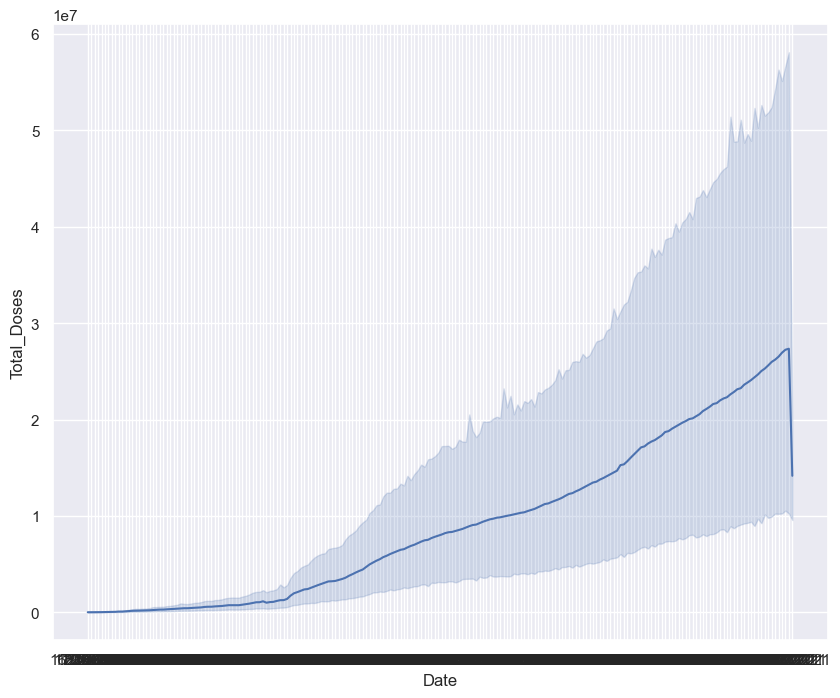

In [44]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Date', y='Total_Doses', data=Vaccine_drive)
plt.show()

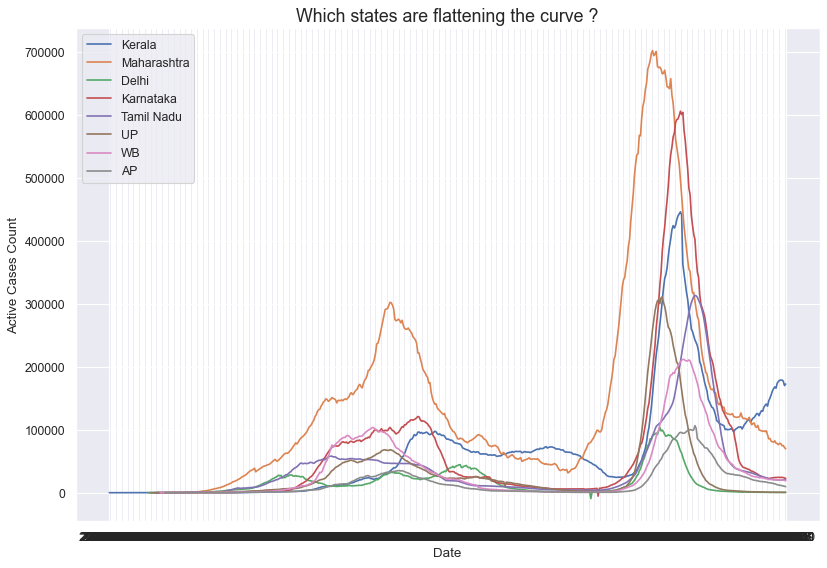

In [45]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(KL['Date'], KL['Active_cases'])
plt.plot(MH['Date'], MH['Active_cases'])
plt.plot(Delhi['Date'], Delhi['Active_cases'])
plt.plot(KR['Date'], KR['Active_cases'])
plt.plot(TN['Date'], TN['Active_cases'])
plt.plot(UP['Date'], UP['Active_cases'])
plt.plot(AP['Date'], AP['Active_cases'])
plt.plot(Odisha['Date'], Odisha['Active_cases'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'UP', 'WB', 'AP','Chhatisgarh','Odisha'], loc='upper left')
plt.xlabel('Date', size=12)
plt.ylabel('Active Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()